# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64_v2/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### DDPG Implementation

In [7]:
from utils import Config
from nn import Actor, Critic, ContinuousActorCriticNet
from agent import DDPG_Agent, PPO_Agent

Running on: cuda:0


In [8]:
from collections import deque
import time
import datetime

import torch
import pickle

class PPO_Trainer():
    ''' Train PPO agent. '''
    
    TARGET_SCORE = 30                             # Enviroment average target score over 100 consecutive episodes
    def __init__(self, agent, n_agents=1):
        '''
        Params
        ======
        agent (object): PPO agent class
        n_agents (int): Number of parallel agents
        '''
        self.agent = agent
        self.n_agents = n_agents
        self.scores_deque = deque(maxlen=100)     # last 100 scores
        self.scores_ep = []                       # list containing scores from each episode
        self.max_score = 0                        # initialize agent max score 

    def train(self, n_episodes=1000, print_every=100, verbose=True, save=True, 
              save_name='', stop=False):
        ''' Train the agent. '''
        
        start_time = time.time()                   # register start time
        num_agents = self.n_agents
        
        for i_episode in range(1, n_episodes+1):
            
            self.agent.reset()
            
            scores = self.agent.step()
            scores = np.sum(scores, axis=0)

  
            self.scores_deque.append(np.mean(scores))
            self.scores_ep.append(np.mean(scores))

            exec_time = time.time() - start_time
            print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(self.scores_deque):.2f} ' + \
                  f'exec.time: {str(datetime.timedelta(seconds=exec_time))}', end="")

            if i_episode % print_every == 0 and verbose:
                print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(self.scores_deque):.2f} ' + \
                      f'exec.time: {str(datetime.timedelta(seconds=exec_time))}')

            ## Check if eviroment is solved and save checkpoint
            if np.mean(self.scores_deque) >= self.TARGET_SCORE and len(self.scores_deque) == 100:
                if self.max_score == 0:
                    print(' <-- Objective Achived!')
                    print(f'- Average score of +{np.mean(self.scores_deque):.2f} over 100 consecutive episodes')

                    if stop:
                        print('- Trainining Finished -')
                        print(f'- Total training time:\t{str(datetime.timedelta(seconds=exec_time))}')
                        
                    
                        if save:
                            torch.save(self.agent.network.state_dict(), f'checkpoint_ppo_net_{save_name}.pth')
                            
                            with open(f'scores_{save_name}.pkl', 'wb') as handle:
                                pickle.dump(self.scores_ep, handle, protocol=pickle.HIGHEST_PROTOCOL)
                            
                        return self.scores_ep, i_episode

                if np.mean(self.scores_deque) >= self.max_score:
                    max_score = np.mean(self.scores_deque)

                    if save:
                        torch.save(self.agent.network.state_dict(), f'checkpoint_ppo_net_{save_name}.pth')

        exec_time = time.time() - start_time                   # compute training time

        ## save training scores
        if save:
            with open(f'scores_{save_name}.pkl', 'wb') as handle:
                pickle.dump(self.scores_ep, handle, protocol=pickle.HIGHEST_PROTOCOL)


        print('- Trainining Finished -')
        print(f'\t-Total training time:\t{str(datetime.timedelta(seconds=exec_time))}')
        if self.max_score > 0:
            print(f'\t-Maximum average score of +{max_score} over 100 consecutive episodes')
        else:
            if stop:
                return self.scores_ep, 9999
            print('!!! Objective NOT achived !!!')
        return self.scores_ep
        

In [9]:
config = Config()

config.batch_size = 128


config.gamma = 0.99
# config.tau = 1e-3
config.gae_tau = 0.95
config.lr = 5e-5
config.l2_reg = 0
config.clip_grad = 1

config.fc1_act = 400
config.fc2_act = 300
config.fc1_crit = 400
config.fc2_crit = 300
config.trajectory_steps = 1000
config.SGD_epoch = 10

config.epsilon = 0.1
config.beta = 0.01

config.add_noise = True

config.bn = False

In [10]:
import pickle
with open('PPO_config.pkl', 'wb') as handle:
    pickle.dump(config, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [11]:
config.brain_name = brain_name
config.env = env

In [12]:
agent = PPO_Agent(state_size, action_size, random_seed=420, config=config)

In [13]:
trainer = PPO_Trainer(agent, num_agents)


In [14]:
scores, _ = trainer.train(n_episodes=500, print_every=100, verbose=True, save=True, stop=True,
                          save_name='PPO_test_')

Episode 100	Average Score: 2.81 exec.time: 0:35:30.431455
Episode 200	Average Score: 13.78 exec.time: 1:12:21.795442
Episode 300	Average Score: 26.73 exec.time: 1:49:03.906161
Episode 342	Average Score: 30.07 exec.time: 2:04:32.573378 <-- Objective Achived!
- Average score of +30.07 over 100 consecutive episodes
- Trainining Finished -
- Total training time:	2:04:32.573378


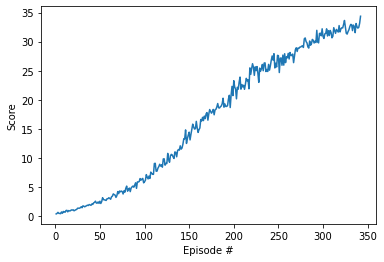

In [15]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
import datetime
import time
import pickle

# agent = Agent(state_size, action_size, random_seed=2)



class Trainer():
    
    TARGET_SCORE = 30
    def __init__(self, env, brain_name, agent, n_agents=1):
        self.agent = agent
        self.n_agents = n_agents
        self.scores_deque = deque(maxlen=100)     # last 100 scores
        self.scores_ep = []                       # list containing scores from each episode
        self.env = env
        self.brain_name = brain_name
        self.max_score = 0                        # initialize agent max score 

        
    def train(self, n_episodes=1000, max_t=500, print_every=100, verbose=True, save=True, 
              save_name='', stop=False):
        
        start_time = time.time()                   # register start time
        num_agents = self.n_agents
        
        for i_episode in range(1, n_episodes+1):
            env_info = self.env.reset(train_mode=True)[brain_name]   # Init Enviroment
            states = env_info.vector_observations                    # Get Initial State
            scores = np.zeros(self.n_agents)                            # array with episode scores

            self.agent.reset()                                       # Reset Noise
            for t in range(max_t):
                actions = self.agent.act(states)

                env_info = self.env.step(actions)[self.brain_name]
    #             print(env_info.vector_observations.shape)
                next_state = env_info.vector_observations
                rewards = env_info.rewards
                done = env_info.local_done
                
                for n in range(num_agents):
                    self.agent.step(states[n], actions[n], rewards[n], next_state[n], done[n])
                states = next_state
                scores += rewards
#                 print(done)
                if np.any(done):
                    break 
            self.scores_deque.append(np.mean(scores))
            self.scores_ep.append(np.mean(scores))

            exec_time = time.time() - start_time
            print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(self.scores_deque):.2f} ' + \
                  f'exec.time: {str(datetime.timedelta(seconds=exec_time))}', end="")

            if i_episode % print_every == 0 and verbose:
                print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(self.scores_deque):.2f} ' + \
                      f'exec.time: {str(datetime.timedelta(seconds=exec_time))}')

            ## Check if eviroment is solved and save checkpoint
            if np.mean(self.scores_deque) >= self.TARGET_SCORE and len(self.scores_deque) == 100:
                if self.max_score == 0:
                    print(' <-- Objective Achived!')
                    print(f'- Average score of +{np.mean(self.scores_deque):.2f} over 100 consecutive episodes')

                    if stop:
                        print('- Trainining Finished -')
                        print(f'- Total training time:\t{str(datetime.timedelta(seconds=exec_time))}')
                        
                    
                        if save:
                            torch.save(self.agent.actor_local.state_dict(), f'checkpoint_actor_{save_name}.pth')
                            torch.save(self.agent.critic_local.state_dict(), f'checkpoint__critic_{save_name}.pth')
                            
                            with open(f'scores_{save_name}.pkl', 'wb') as handle:
                                pickle.dump(self.scores_ep, handle, protocol=pickle.HIGHEST_PROTOCOL)
                            
                        return self.scores_ep, i_episode

                if np.mean(self.scores_deque) >= self.max_score:
                    max_score = np.mean(self.scores_deque)

                    if save:
                        torch.save(self.agent.actor_local.state_dict(), f'checkpoint_actor_{save_name}.pth')
                        torch.save(self.agent.critic_local.state_dict(), f'checkpoint__critic_{save_name}.pth')

        exec_time = time.time() - start_time                   # compute training time

        ## save training scores
        if save:
            with open(f'scores_{save_name}.pkl', 'wb') as handle:
                pickle.dump(self.scores_ep, handle, protocol=pickle.HIGHEST_PROTOCOL)


        print('- Trainining Finished -')
        print(f'\t-Total training time:\t{str(datetime.timedelta(seconds=exec_time))}')
        if self.max_score > 0:
            print(f'\t-Maximum average score of +{max_score} over 100 consecutive episodes')
        else:
            if stop:
                return self.scores_ep, 9999
            print('!!! Objective NOT achived !!!')
        return self.scores_ep
        


In [11]:
import itertools

def nn_gridsearch(hiper_dict,inter=1, n_episodes=30, max_t=700, save_name=''):
    """Grid Search for NN eural Network Hiperparameters.
    
    Find the best hiperparameter based on training speed (number of episodes taken to achive score of +13).
    
    Params
    ======
        hiper_dict (dict): Hiperparameters dictionary with key = <hiperparameter attribute name> and value = 
                            <list of hiperparameter values to be searched>. ex:
                            hiper_dict = {
                                            'start_filter': [16, 32],
                                            'layers': [1, 2],
                                            'dropout': [0.1, 0.2]
                                        } 
        inter (int): Number of intercations at each hiperparameter set.
                        
    """
    best_score = -1
    best = {}
    for hiper in itertools.product(*hiper_dict.values()):
        h_dict = {k: h for k, h in zip(hiper_dict.keys(), hiper)}
        
        config = Config()
        config.merge(h_dict)
#         print(config)
        print(h_dict)
        for i in range(inter):
            
            agent = DDPG_Agent(state_size, action_size, random_seed=4200, config=config)
            
            trainer = Trainer(env, brain_name, agent, num_agents)
            
            scores, lst_episode = trainer.train(n_episodes=n_episodes, max_t=max_t, verbose=False, save=False, 
                          save_name=save_name, stop=True)

            if np.mean(scores[-5:]) > best_score:
                best_score = np.mean(scores[-min(n_episodes,100):])
                best = h_dict

            print('-'*20)
    print(f'Best training score: {best_score}')
    print('Best Hiperprameters:')
    for k in best:
        print(f'\t{k}: {best[k]}')
        
    return best, best_score

In [12]:
hiper_dict = {
    'gamma': [.99],
    'tau': [1e-3],
    'lr_critic': [1e-3],
    'lr_actor': [1e-4],
    'l2_reg': [0],
    'clip_grad_act': [1],
    'clip_grad_crit': [1],
    'fc1_act': [400],
    'fc2_act': [300],
    'fc1_crit': [400],
    'fc2_crit': [300],
    'update_every': [5],
    'update_times': [2],
    'bn': [True, False]
}

best, best_score = nn_gridsearch(hiper_dict, inter=1, n_episodes=50, max_t=1000, save_name='DDPG_test')

{'gamma': 0.99, 'tau': 0.001, 'lr_critic': 0.001, 'lr_actor': 0.0001, 'l2_reg': 0, 'clip_grad_act': 1, 'clip_grad_crit': 1, 'fc1_act': 400, 'fc2_act': 300, 'fc1_crit': 400, 'fc2_crit': 300, 'update_every': 5, 'update_times': 2, 'bn': True}
Episode 50	Average Score: 21.29 exec.time: 1:44:31.978746- Trainining Finished -
	-Total training time:	1:44:31.979709
--------------------
{'gamma': 0.99, 'tau': 0.001, 'lr_critic': 0.001, 'lr_actor': 0.0001, 'l2_reg': 0, 'clip_grad_act': 1, 'clip_grad_crit': 1, 'fc1_act': 400, 'fc2_act': 300, 'fc1_crit': 400, 'fc2_crit': 300, 'update_every': 5, 'update_times': 2, 'bn': False}
Episode 50	Average Score: 3.13 exec.time: 1:24:57.094339- Trainining Finished -
	-Total training time:	1:24:57.094339
--------------------
Best training score: 21.29408952404
Best Hiperprameters:
	gamma: 0.99
	tau: 0.001
	lr_critic: 0.001
	lr_actor: 0.0001
	l2_reg: 0
	clip_grad_act: 1
	clip_grad_crit: 1
	fc1_act: 400
	fc2_act: 300
	fc1_crit: 400
	fc2_crit: 300
	update_every: 5

In [12]:
config = Config()

config.buffer_size = int(1e6)
config.batch_size = 128

config.gamma = 0.99
config.tau = 1e-3
config.lr_critic = 5e-5
config.lr_actor = 5e-5
config.l2_reg = 0
config.clip_grad_act = 1
config.clip_grad_crit = 1

config.fc1_act = 400
config.fc2_act = 300
config.fc1_crit = 400
config.fc2_crit = 300
config.update_every = 20
config.update_times = 10
config.bn = False

In [13]:
with open('DDPG_config.pkl', 'wb') as handle:
    pickle.dump(config, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [14]:
agent = DDPG_Agent(state_size, action_size, random_seed=420, config=config)

In [15]:
trainer = Trainer(env, brain_name, agent, num_agents)


In [16]:
scores, _ = trainer.train(n_episodes=500, max_t=1000, print_every=100, verbose=True, save=True, stop=True,
                          save_name='DDPG_test_')

Episode 100	Average Score: 33.67 exec.time: 4:59:55.688323
 <-- Objective Achived!
- Average score of +33.67 over 100 consecutive episodes
- Trainining Finished -
- Total training time:	4:59:55.688323


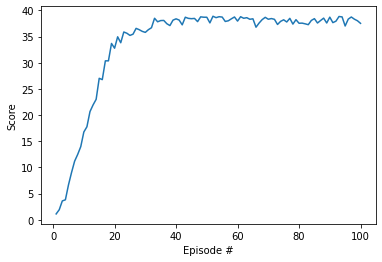

In [17]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [24]:
with open('DDPG_config.pkl', 'rb') as handle:
    config = pickle.load(handle)

agent = DDPG_Agent(state_size, action_size, random_seed=420, config=config)


agent.actor_local.load_state_dict(torch.load('checkpoint_actor_DDPG_test_.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint__critic_DDPG_test_.pth'))

                                   
for i in range(1):
    env_info = env.reset(train_mode=False)[brain_name]   # Init Enviroment
    states = env_info.vector_observations                    # Get Initial State
    scores = np.zeros(num_agents)                            # array with episode scores

    agent.reset()                                       # Reset Noise
    for t in range(500):
        actions = agent.act(states, add_noise=False)
        env_info = env.step(actions)[brain_name]
        next_state = env_info.vector_observations
        rewards = env_info.rewards
        done = env_info.local_done
        states = next_state
        scores += rewards
#                 print(done)
        if np.any(done):
            break       
    print(f'Turn {i} Mean Score: {np.mean(scores)}')

Turn 0 Mean Score: 18.95299957636744


In [28]:
with open('PPO_config.pkl', 'rb') as handle:
    config = pickle.load(handle)
    
config.brain_name = brain_name
config.env = env

agent = PPO_Agent(state_size, action_size, random_seed=420, config=config)


agent.network.load_state_dict(torch.load('checkpoint_ppo_net_PPO_test_.pth'))

                                   
for i in range(1):
    env_info = config.env.reset(train_mode=False)[brain_name]   # Init Enviroment
    states = env_info.vector_observations                    # Get Initial State
    scores = np.zeros(num_agents)                            # array with episode scores

    agent.reset()                                       # Reset Noise
    for t in range(500):
        actions = agent.act(states, add_noise=False)
        env_info = config.env.step(actions)[brain_name]
        next_state = env_info.vector_observations
        rewards = env_info.rewards
        done = env_info.local_done
        states = next_state
        scores += rewards
#                 print(done)
        if np.any(done):
            break       
    print(f'Turn {i} Mean Score: {np.mean(scores)}')


Turn 0 Mean Score: 18.545999585464596
